In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as l
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import scipy.stats as stats

In [89]:
data = pd.read_csv("2a.csv")
data.insert(1, 'const', 1)
data.head(10)

,Y,const,X1,X2,X3,X4
0,8.0,1,78,284,9.1,109
1,9.3,1,68,433,8.7,144
2,7.5,1,70,739,7.2,113
3,8.9,1,96,1792,8.9,97
4,10.2,1,74,477,8.3,206
5,8.3,1,111,362,10.9,124
6,8.8,1,77,671,10.0,152
7,8.8,1,168,636,9.1,162
8,10.7,1,82,329,8.7,150
9,11.7,1,89,634,7.6,134


In [90]:
data = data.iloc[:54,:]

## Part i

In [91]:
X = np.array(data.iloc[:45,1:])
y = np.array(data.iloc[:45,0])
X_transpose = X.T
XtX = np.dot(X_transpose, X)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X_transpose, y)
beta = np.dot(XtX_inv, Xty)
print("Regression coefficients: ")
print(beta)

Regression coefficients: 
[ 1.16665362e+01  8.16322699e-03  5.33471694e-04 -3.17249924e-01
 -6.67795114e-03]


In [95]:
# predictions
x_test = np.array(data.iloc[45:54,1:])
outputs = np.dot(x_test, beta)
print("predictied values from 46 to 53:")
print(outputs)

predictied values from 46 to 53:
[ 8.66016434  9.46211807  9.17757627 10.16851664  9.86690097  9.69766263
  9.06935239  9.31206337]


Mean absolute error: 1.491751167599547
Mean squared error: 2.9513211841139992


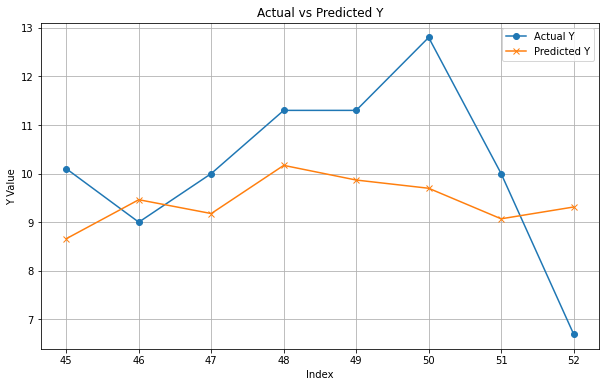

In [96]:
actual_y = data.iloc[45:54, 0]

# Create a DataFrame with both actual and predicted values
results_df = pd.DataFrame({
    'Actual Y': actual_y,
    'Predicted Y': outputs
})

print("Mean absolute error: {}".format(mean_absolute_error(outputs, actual_y)))
print("Mean squared error: {}".format(mean_squared_error(outputs, actual_y)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual Y'], label='Actual Y', marker='o')
plt.plot(results_df['Predicted Y'], label='Predicted Y', marker='x')
plt.title('Actual vs Predicted Y')
plt.xlabel('Index')
plt.ylabel('Y Value')
plt.legend()
plt.grid(True)
plt.show()

In [97]:


x0 = np.array([1, 75, 345, 9.6, 92]) 
y_hat = np.dot(x0, beta)

# Number of observations and parameters
n = len(data)  
p = len(beta) 
residuals = data['Y'] - np.dot(data.iloc[:, 1:], beta)  # Assuming first column is Y
sigma_squared = np.sum(residuals**2) / (n - p)
X = data.iloc[:, 1:] 
XtX_inv = np.linalg.inv(np.dot(X.T, X))
se_y_hat = np.sqrt(sigma_squared * (1 + np.dot(np.dot(x0.T, XtX_inv), x0)))

alpha = 0.01  # For a 99% confidence interval
df = n - p
t_critical = stats.t.ppf(1 - alpha/2, df)

# 99% Confidence interval
ci_lower = y_hat - t_critical * se_y_hat
ci_upper = y_hat + t_critical * se_y_hat

(ci_lower, ci_upper)


(4.358671888310219, 13.247038518843048)

In [99]:
# X

## Part ii

In [100]:
X = np.array(data.iloc[:45,2:])
y = np.array(data.iloc[:45,0])
X_transpose = X.T
XtX = np.dot(X_transpose, X)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X_transpose, y)
beta = np.dot(XtX_inv, Xty)
print("Regression coefficients: ")
print(beta)

Regression coefficients: 
[ 0.00519136  0.00113285  0.8501428  -0.00256479]


In [101]:
# predictions
x_test = np.array(data.iloc[45:54,2:])
outputs = np.dot(x_test, beta)
print("predictied values from 46 to 53:")
print(outputs)

predictied values from 46 to 53:
[12.47117652  8.1974552   8.45249343  7.67843574  8.20346711  6.93175725
  9.63470442  8.33058404]


Mean absolute error: 2.4129309730885
Mean squared error: 8.574262269057344


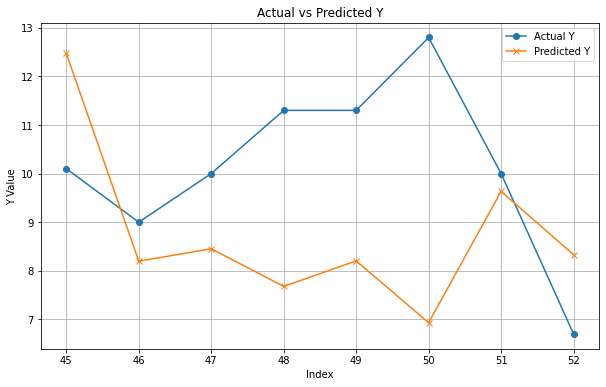

In [102]:
actual_y = data.iloc[45:54, 0]

# Create a DataFrame with both actual and predicted values
results_df = pd.DataFrame({
    'Actual Y': actual_y,
    'Predicted Y': outputs
})

print("Mean absolute error: {}".format(mean_absolute_error(outputs, actual_y)))
print("Mean squared error: {}".format(mean_squared_error(outputs, actual_y)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual Y'], label='Actual Y', marker='o')
plt.plot(results_df['Predicted Y'], label='Predicted Y', marker='x')
plt.title('Actual vs Predicted Y')
plt.xlabel('Index')
plt.ylabel('Y Value')
plt.legend()
plt.grid(True)
plt.show()

### The first model without using constants is preferred since the mean absolute error and the mean squared error in this case is significantly less than the previous one

In [103]:
x0 = np.array([75, 345, 9.6, 92]) 
y_hat = np.dot(x0, beta)

# Number of observations and parameters
n = len(data)  
p = len(beta) 
residuals = data['Y'] - np.dot(data.iloc[:, 2:], beta)  # Assuming first column is Y
sigma_squared = np.sum(residuals**2) / (n - p)
X = data.iloc[:, 2:] 
XtX_inv = np.linalg.inv(np.dot(X.T, X))
se_y_hat = np.sqrt(sigma_squared * (1 + np.dot(np.dot(x0.T, XtX_inv), x0)))

alpha = 0.01  # For a 99% confidence interval
df = n - p
t_critical = stats.t.ppf(1 - alpha/2, df)

# 99% Confidence interval
ci_lower = y_hat - t_critical * se_y_hat
ci_upper = y_hat + t_critical * se_y_hat

(ci_lower, ci_upper)


(2.8496420380755154, 14.561548163591333)

## Question 2 b

In [86]:
# Calculate the regression coefficients using mean and variances
x = np.array([56,75,61,61,67,72,62,61])
y = np.array([21,39,34,21,32,24,29,24])
x_mean = np.mean(x)
y_mean = np.mean(y)
x_variance = np.var(x, ddof=1)  # Using ddof=1 for sample variance
xy_covariance = np.cov(x, y, ddof=1)[0, 1]

# Coefficients
slope = xy_covariance / x_variance
intercept = y_mean - slope * x_mean

# Print all the calculated values
x_mean, y_mean, x_variance, xy_covariance, intercept, slope



(64.375,
 28.0,
 41.125,
 24.285714285714285,
 -10.015631784628738,
 0.5905340859748154)